The Monte Carlo approach to solve the gridworld task is somewhat naive but effective. Basically we can produce n simulations starting from random points of the grid, and let the robot move randomly to the four directions until a termination state is achieved. 

For each simulation we save the 4 values: 

(1) the initial state, (2) the action taken, (3) the reward received and (4) the final state. 

In the end, a simulation is just an array containing x arrays of these values, x being the number of steps the robot had to take until reaching a terminal state.

Now, from these simulations, we iterate from the end of the “experience” array, and compute G as the previous state value in the same experience (weighed by gamma, the discount factor) plus the received reward in that state. We then store G in an array of Returns(St). 

Finally, for each state we compute the average of the Returns(St) and we set this as the state value at a particular iteration.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


# First-visit Monte Carlo

In [2]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [3]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [4]:
states

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

In [5]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
      
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [6]:
generateEpisode()

[[[0, 3], [-1, 0], -1, [0, 3]],
 [[0, 3], [0, 1], -1, [0, 3]],
 [[0, 3], [0, 1], -1, [0, 3]],
 [[0, 3], [0, -1], -1, [0, 2]],
 [[0, 2], [1, 0], -1, [1, 2]],
 [[1, 2], [0, 1], -1, [1, 3]],
 [[1, 3], [1, 0], -1, [2, 3]],
 [[2, 3], [1, 0], -1, [3, 3]]]

In [7]:
for it in tqdm(range(numIterations),disable=True):
    episode = generateEpisode()
    G = 0
    print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

[[[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1,

[[[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, 

[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2,

[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1,

[[[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, 

[[[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1

[[[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -

[[[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1,

[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, 

[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1

[[[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3

[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, 

[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, 

[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], 

[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1

[[[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0

[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], 

[[[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1

[[[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1

[[[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, 

[[[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], 

[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, 

[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3

[[[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0

[[[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -

[[[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2

[[[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [

[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]]

[[[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2

[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -

[[[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, 

[[[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2

[[[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2,

[[[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1,

[[[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 

[[[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1

[[[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1,

[[[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1],

[[[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, 

[[[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1

[[[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 

[[[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0],

[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2

[[[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [

[[[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, 

[[[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2

[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [

[[[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [

[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [

[[[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, 

[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0,

[[[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [

[[[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1,

[[[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0]

[[[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], 

[[[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 

[[[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1

[[[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -

[[[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1

[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, 

[[[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1,

[[[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -

[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [

[[[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2

[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], 

[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, 

[[[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 

[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [

[[[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [

[[[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [

[[[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3,

[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 

[[[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [

[[[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1

[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]

[[[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 

[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0],

[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1

[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2

[[[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1],

[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, 

[[[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3,

[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1,

[[[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [

[[[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, 

[[[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2,

[[[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -

[[[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -

[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], 

[[[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 

[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1

[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [

[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1

[[[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -

[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]

[[[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -

[[[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [

[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 2], [1, 0], 

[[[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], 

[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 2], [-1, 0], -1,

[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1

[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3

[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, 

[[[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2

[[[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1,

[[[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1

[[[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1],

[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1,

[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1,

[[[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1

[[[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], 

[[[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1

[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1],

[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1

[[[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1

[[[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, 

[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2,

[[[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1

[[[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3

[[[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1,

[[[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [1, 0], -1, [3,

[[[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1

[[[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0

[[[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1,

[[[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1

[[[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [

[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [-1, 0], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [1, 0], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, -1], -1

[[[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [-1, 0], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [

[[[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, -1], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [1, 0], -1, [3, 0]], [[3, 0], [-1, 0], -1, [2, 0]], [[2, 0], [-1, 0], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, -1], -1, [2, 0]], [[2, 0], [0, -1], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [-1,

[[[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [-1, 0], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, 1], -1, [0, 2]], [[0, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1

[[[1, 0], [1, 0], -1, [2, 0]], [[2, 0], [0, 1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [-1, 0], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [0, 1], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [1, 0], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, 1], -1, [1,

[[[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, -1], -1, [3, 0]], [[3, 0], [0, 1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, -1], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [0, -1], -1, [0, 2]], [[0, 2], [1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [0, -1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [1, 0], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, 1], -1, [2, 3]], [[2, 3], [1, 0], -1, [3, 3]]]
[[[2, 3], [0, 1], -1, [2, 3]], [[2, 3], [-1, 0], -1, [1, 3]], [[1, 3], [0, 1], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [

In [8]:
G

-2.49882453753856

In [9]:
step[2]

-1

In [10]:
idx

(1, 3)

In [11]:
returns[idx]

[-1.6,
 -1.6,
 -1.96,
 -1.6,
 -1.6,
 -1.96,
 -2.3056,
 -1.6,
 -1.96,
 -2.4748057599999997,
 -2.4967348264959996,
 -2.4848834559999995,
 -2.4909300735999995,
 -2.4945580441599997,
 -2.4980408958975997,
 -2.499945157623399,
 -2.499967094574039,
 -2.499992892427992,
 -2.4999974412740773,
 -1.96,
 -2.176,
 -2.4909300735999995,
 -2.4945580441599997,
 -2.4967348264959996,
 -1.6,
 -1.6,
 -2.3056,
 -2.4748057599999997,
 -2.4909300735999995,
 -2.4998476600649973,
 -2.499908596038998,
 -1.6,
 -1.6,
 -2.176,
 -2.176,
 -2.4580095999999996,
 -1.6,
 -1.96,
 -2.176,
 -1.6,
 -2.4300159999999997,
 -2.4580095999999996,
 -2.4748057599999997,
 -2.4580095999999996,
 -2.4945580441599997,
 -2.4967348264959996,
 -1.6,
 -1.96,
 -1.96,
 -2.176,
 -2.3056,
 -2.4580095999999996,
 -2.4748057599999997,
 -1.6,
 -1.96,
 -2.176,
 -2.4997461001083288,
 -2.4967348264959996,
 -2.4980408958975997,
 -1.6,
 -2.4945580441599997,
 -2.176,
 -2.4909300735999995,
 -2.4967348264959996,
 -2.499294722523136,
 -2.4997461001083288,
 -

In [12]:
step[0][0]

1

In [13]:
step[0][1]

0

In [14]:
idx[0]

1

In [15]:
idx[1]

3

In [16]:
newValue

-2.217974048005349

In [17]:
V

array([[ 0.        , -1.63988464, -2.20979736, -2.38046517],
       [-1.63679141, -2.10587355, -2.2763928 , -2.21797405],
       [-2.20427732, -2.27892346, -2.098573  , -1.63286757],
       [-2.37291006, -2.21590532, -1.62524566,  0.        ]])

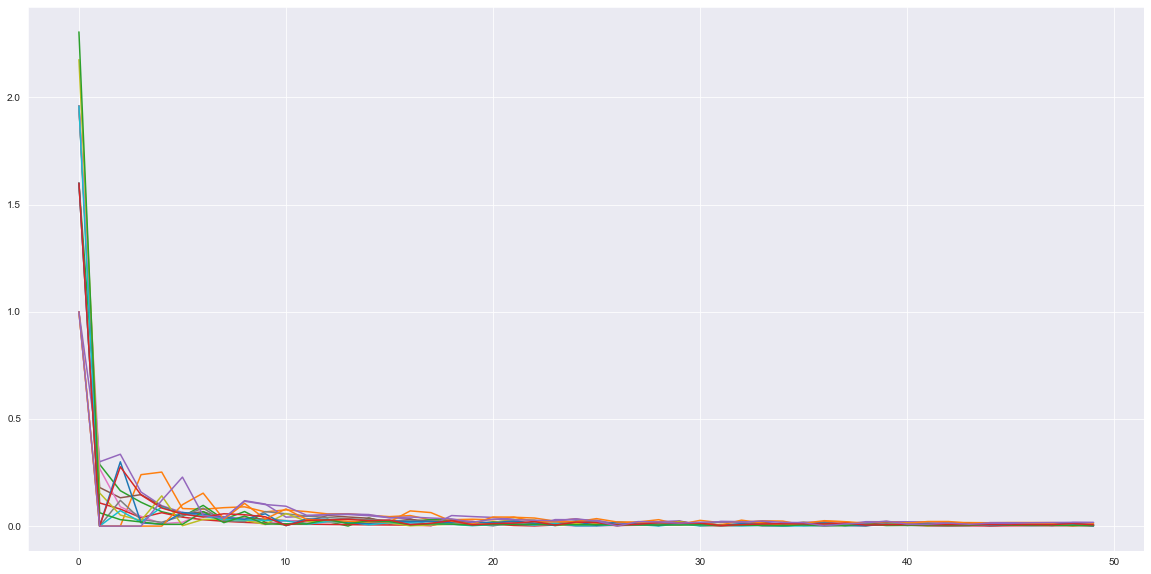

In [22]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

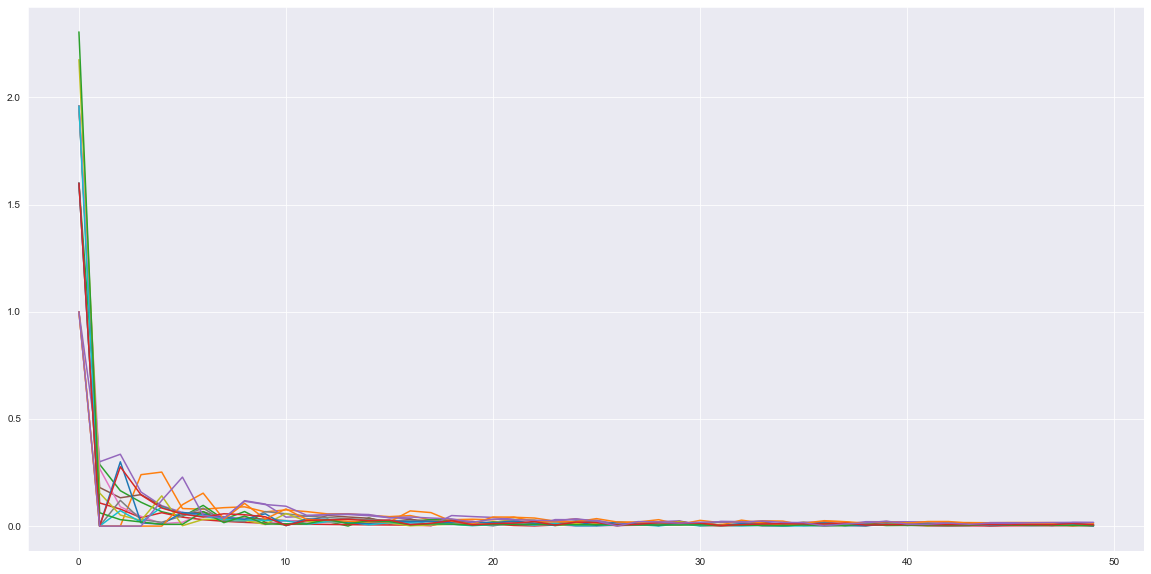

In [19]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

Note that varying the gamma can decrease the convergence time as we can see in the last two plots using gamma=1 and gamma=0.6. The good side of this approach is that:

Technically, we don’t have to compute all the state-values for all the states if we don’t want. We could just focus on a particular grid point and start all the simulations from that initial state to sample episodes that include that state, ignoring all others. This can radically decrease the computational expense.

As I said before, this approach does not require a full understanding of the environment dynamics and we can learn directly from experience or simulation.

In [233]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns

sns.set_style("darkgrid")


class Foo:
    def __init__(self):
        # parameters
        self.gamma = 0.6  # discounting rate
        self.rewardSize = -1
        self.gridSize = 4
        self.terminationStates = [[0, 0], [self.gridSize - 1, self.gridSize - 1]]
        self.actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
        self.numIterations = 10000
        # initialization
        self.V = np.zeros((self.gridSize, self.gridSize))
        self.returns = {(i, j): list() for i in range(self.gridSize) for j in range(self.gridSize)}
        self.deltas = {(i, j): list() for i in range(self.gridSize) for j in range(self.gridSize)}
        self.states = [[i, j] for i in range(self.gridSize) for j in range(self.gridSize)]

    # utils
    def generateEpisode(self):
        initState = random.choice(self.states[1:-1])
        episode = []
        while True:
            if list(initState) in self.terminationStates:
                return episode

            action = random.choice(self.actions)
            finalState = np.array(initState) + np.array(action)
            if -1 in list(finalState) or self.gridSize in list(finalState):
                finalState = initState
            episode.append([list(initState), action, self.rewardSize, list(finalState)])
            initState = finalState

    def go(self, verbose=0, plot_heatmap=False):
        episode = self.generateEpisode()
        G = 0
        if verbose >= 1:
            for i, epi in enumerate(episode):
                print(i, epi)
            print()
        visited_states = [step[0] for step in episode]
        while episode:
            [current_state, action, reward, next_state] = episode.pop(-1)
            if verbose >= 2:
                print("1. current step info: %s,%s,%s,%s" % (str(current_state), str(action), reward, str(next_state)))
            G = self.gamma * G + reward  # accumulate rewards for each step, but only update states when it first appears
            if verbose >= 2:
                print("2. updated G = %f" % G)
            previous_states = visited_states[:len(episode)]
            if verbose >= 2:
                print("3. got a list of visited states from start of this sequance: %s" % str(previous_states))
            if current_state not in previous_states:  # --- this means state s is start from here --- 
                if verbose >= 2:
                    print("4.1. visit of state %s starts from here" % current_state)
                s = tuple(current_state)
                self.returns[s].append(G)  # append gain to state s only one time for each episode
                if verbose >= 2:
                    print("4.1.1. append G = %s to returns %s" % (G, str(self.returns)))
                tmp = np.average(self.returns[s])
                if verbose >= 2:
                    print("4.1.2. avg returns = %f" % tmp)
                self.deltas[s].append(np.abs(self.V[s] - tmp))  # recode the state value upgrades of each state
                if verbose >= 2:
                    print("4.1.3. delta(state-value) = %f updated" % np.abs(self.V[s] - tmp))
                    print("4.1.4. state-value from %f ---> " % (self.V[s]), end='')
                self.V[s] = tmp  # upgrade the value of state s
                if verbose >= 2:
                    print("%f" % (self.V[s]))
            else:
                if verbose >= 2:
                    print("4.2. this is not the start of state %s in this episode, continue searching backward." % current_state)
            if verbose >= 2:
                print()
        if plot_heatmap:
            self.__plot_heatmap()

    def __plot_series(self):
        # using gamma = 1
        plt.figure(figsize=(5, 4))
        all_series = [list(x)[:50] for x in self.deltas.values()]
        for series in all_series:
            plt.plot(series)

    def __plot_heatmap(self):
        df = pd.DataFrame(self.V)  # turn 2-d array to dataframe
        fig, ax = plt.subplots(figsize=(4, 3))  # figure size
        sns.heatmap(df, ax=ax, annot=True)  # display both color and value

0 [[1, 1], [-1, 0], -1, [0, 1]]
1 [[0, 1], [1, 0], -1, [1, 1]]
2 [[1, 1], [-1, 0], -1, [0, 1]]
3 [[0, 1], [-1, 0], -1, [0, 1]]
4 [[0, 1], [0, -1], -1, [0, 0]]

1. current step info: [0, 1],[0, -1],-1,[0, 0]
2. updated G = -1.000000
3. got a list of visited states from start of this sequance: [[1, 1], [0, 1], [1, 1], [0, 1]]
4.2. this is not the start of state [0, 1] in this episode, continue searching backward.

1. current step info: [0, 1],[-1, 0],-1,[0, 1]
2. updated G = -1.600000
3. got a list of visited states from start of this sequance: [[1, 1], [0, 1], [1, 1]]
4.2. this is not the start of state [0, 1] in this episode, continue searching backward.

1. current step info: [1, 1],[-1, 0],-1,[0, 1]
2. updated G = -1.960000
3. got a list of visited states from start of this sequance: [[1, 1], [0, 1]]
4.2. this is not the start of state [1, 1] in this episode, continue searching backward.

1. current step info: [0, 1],[1, 0],-1,[1, 1]
2. updated G = -2.176000
3. got a list of visited 

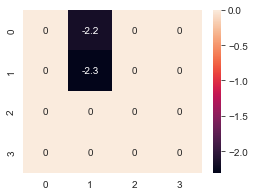

In [234]:
foo = Foo()
# for i in range(2000):
#     foo.go(verbose=0, plot_heatmap=False)
foo.go(verbose=2, plot_heatmap=True)

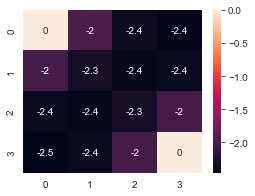

In [232]:
for i in range(2000):
    foo.go(verbose=0, plot_heatmap=False)
foo.go(verbose=0, plot_heatmap=True)